In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load data from Drive
df = pd.read_csv('/content/drive/MyDrive/vegetables.csv')

# Show first few rows
print("First 5 rows:")
print(df.head())



First 5 rows:
   vitamin_a  vitamin_c     fiber   type
0  70.783510  35.779827  8.313735   root
1  54.353822  49.421245  5.989785  fruit
2   8.172535  82.824925  1.149330  fruit
3  45.830064  33.520805  0.938573  leafy
4  48.469629  17.376159  9.096268   root


In [29]:
# Check if there are missing values
print("\nMissing values:")
print(df.isnull().sum())

# Show class distribution
print("\nVegetable Types Distribution:")
print(df['type'].value_counts())




Missing values:
vitamin_a    0
vitamin_c    0
fiber        0
type         0
dtype: int64

Vegetable Types Distribution:
type
fruit    36
leafy    33
root     31
Name: count, dtype: int64


In [25]:
# Features (X) and Labels (y)
X = df.drop('type', axis=1)
y = df['type']

# Split into Train and Test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [32]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 25.00%

Classification Report:
              precision    recall  f1-score   support

       fruit       0.36      0.57      0.44         7
       leafy       0.00      0.00      0.00         5
        root       0.20      0.12      0.15         8

    accuracy                           0.25        20
   macro avg       0.19      0.23      0.20        20
weighted avg       0.21      0.25      0.22        20



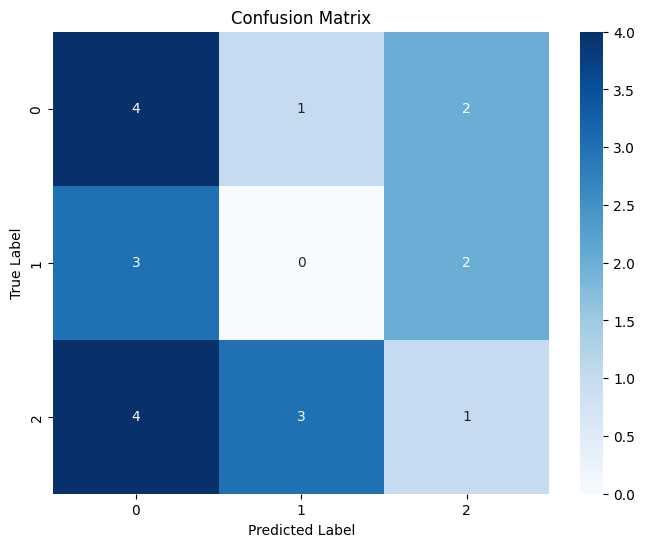

In [34]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<ipython-input-35-94428e1de044>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Features', data=feat_importance, palette="viridis")


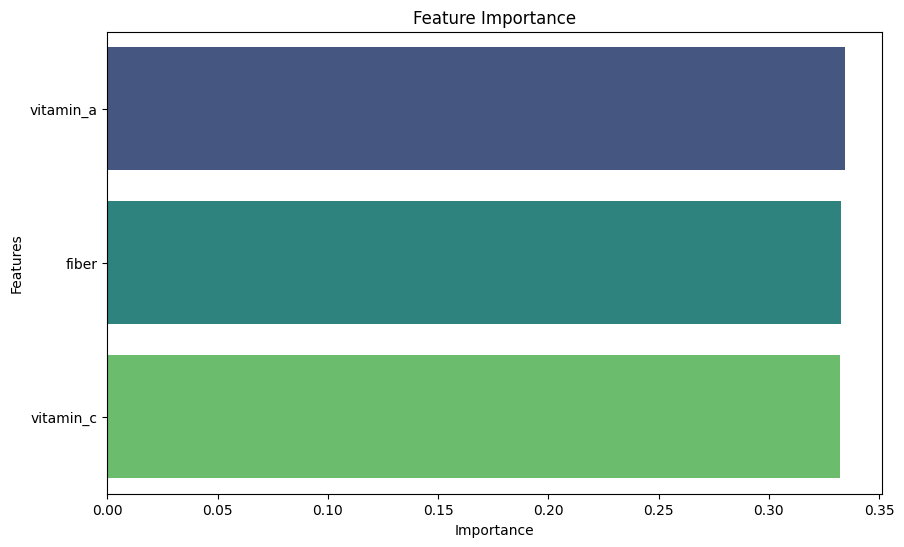

In [35]:
# Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_importance = pd.DataFrame({'Features': feature_names, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Features', data=feat_importance, palette="viridis")
plt.title('Feature Importance')
plt.show()
